In [1]:
import numpy as np
# import sympy as symb
# from sympy import sin,cos
# from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt
import copy

In [94]:
def iterate(delta=0.1,type='jacobi',w=0.0):
    # dt = 0.05 # delta t
    dy = delta
    dz = delta
    ny = int(2./dy)+1   # 21 for 0.1 delta 41 for 0.05 delta
    nz = int(1./dz)+1   # point number

    iter_num = 2000
    # tstep = 100 # total ready time steps
    nu = 1e-6
    theta = 0.08 
    g     = 9.8
    # init condition
    #   use 0-20 or 0-40
    u = np.zeros([iter_num, ny, nz])  
    # f_interm = np.
    # empty[nx+2,ny+2]
    # ind maximum difference between iteratioins

    # jacobi
    abs_err = []
    for iter_ind in range(0,iter_num-1):

        u[iter_ind, :, -1]= u[iter_ind, :, -2]
        for j in range(1,ny-1):
            for k in range(1,nz-1):
                # for jacobi
                if(type=='jacobi'):
                    u[iter_ind+1, j, k] = 0.25*(u[iter_ind, j-1, k] + u[iter_ind, j+1, k] \
                        + u[iter_ind, j, k+1] + u[iter_ind, j,k-1] )+ 0.25 * g * np.sin(theta) * dy*dz/nu
                if(type=='gs'):
                    u[iter_ind+1, j, k] = 0.25*(u[iter_ind+1, j-1, k] + u[iter_ind, j+1, k] \
                        + u[iter_ind, j, k+1] + u[iter_ind+1, j, k-1] )+ 0.25 * g * np.sin(theta) * dy*dz/nu
                if(type=='sor'):
                    u[iter_ind+1, j, k] = w * 0.25* ( (u[iter_ind+1, j-1, k] + u[iter_ind, j+1, k] \
                        + u[iter_ind, j, k+1] + u[iter_ind+1, j, k-1] )+ g * np.sin(theta) * dy*dz/nu ) + (1-w) * u[iter_ind, j, k]
                # for 
        # call B.C. 
        # u[0, :]    = 0.
        # u[ny, :] = 0.
        # u[:, 0]    = 0.
        # u[:, nz]    = 0.
        # one way flux
        # u[0, :]    = u[1, :]
        # u[ny-2, :] = u[ny-1, :]
        # u[:, 0]    = u[:, 1]
        u[iter_ind+1, :, -1]= u[iter_ind+1, :, -2]
        # one way flux
        # find err
        abs_err.append(np.max(np.abs(u[iter_ind+1,:,:] - u[iter_ind,:,:])))
        if(np.max(np.abs(u[iter_ind+1,:,:] - u[iter_ind,:,:])) < 0.001 and np.max(np.abs(u[iter_ind+1,:,:] - u[iter_ind,:,:])) !=0):
            break
        # if(np.abs(abs_err[iter_ind])<0.001 and ind_jacobi==-1):
            # ind_jacobi = iter_ind
            # print(ind_jacobi)
            # break
    ind_err = 0
    for i in np.array(abs_err):
        ind_err = ind_err + 1 
        if(i<0.001 and i!=0):
            break
    
    # return list by order
    return [u,ind_err,abs_err]


jacobi法收敛速度

In [95]:
delta = 0.1
ny = int(2 / delta) + 1
nz = int(1 / delta) + 1 
[u,ind_err,abs_err] = iterate(type='jacobi',delta=delta,w=1.8)
ind_err

1147

剖面

Text(0.5, 1.0, 'velocity field in the channel cross section')

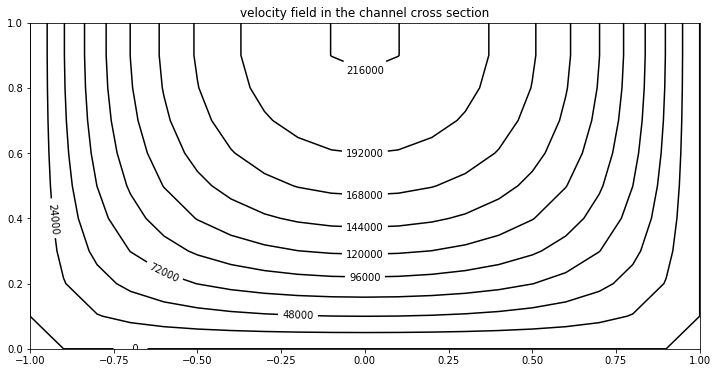

In [66]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1,figsize=(12,6))
# levels_bnd = [0,0.1,0.2,0.3,0.4,0.5,0.6,1]
levels_bnd = np.linspace(0,240000,11)
# cnrt1 = ax[0].contour(np.linspace(-1,1,21),np.linspace(-1,1,21),,levels = levels_bnd,vmin=0,vmax=1,colors="k")
cnrt1 = ax.contour(np.linspace(-1,1,21),np.linspace(0,1,11),u[ind_err+100,:,:].T,levels = levels_bnd,colors='k')
# cnrt2 = ax[1].contour(np.linspace(-1,1,21),np.linspace(-1,1,21),phi[5,1:22,1:22],levels = levels_bnd,vmin=0,vmax=1,colors="k")
# cnrt3 = ax[2].contour(np.linspace(-1,1,21),np.linspace(-1,1,21),phi[20,1:22,1:22],levels = levels_bnd,vmin=0,vmax=1,colors="k")
ax.clabel(cnrt1,fontsize=10,fmt='%4.0f')
# ax[1].clabel(cnrt2,fontsize=10,fmt='%4.1f')
# ax[2].clabel(cnrt3,fontsize=10,fmt='%4.1f')
# ax1 = ax[1].contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,int(1./deltat)],levels = 10,cmap="RdBu_r",norm = norm,vmin=0,vmax=0.8,level=6)
# im = ax.imshow(data, cmap='bone')
# im.clim(vmin=0,vmax=70)
# plt.colorbar(cnrt1,ax=ax,label='BOD',ticks=np.linspace(0,100,11))
# plt.colorbar(cnrt1,ax=ax)
# plt.clim(0,70)
# bound = [0, 10, 20, 40 ,50 ,70]
# ax[0].set_xlabel('x')
# for axi in ax:
    # axi.set_xlabel('x')
    # ax[0].set_ylabel('y')
    # axi.set_ylabel('y')
ax.set_title('velocity field in the channel cross section')
# ax[1].set_title('t=0.25s')
# ax[2].set_title('t=1.00s')

收敛速度

Text(0.5, 1.0, 'center of domain:(y,z)=(0,0.5)')

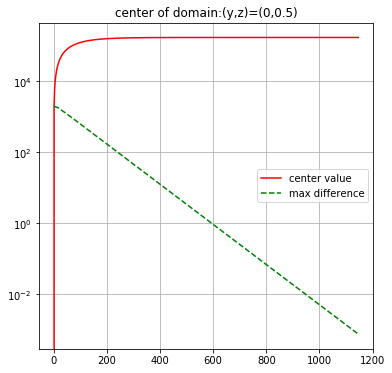

In [51]:
# plot center of domain
series = u[0:ind_err,int((ny-1)/2),int((nz-1)/2)]

# import matplotlib.ticker as tck
fig,ax = plt.subplots(1,1,figsize=(6,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
# ax.set_xscale('log')
ax0=ax.plot(np.linspace(0,ind_err-1,ind_err), series,'-r', label='center value')
ax0=ax.plot(np.linspace(0,ind_err-1,ind_err-2), abs(series[0:-2] - series[1:-1]),'--g', label='max difference')
ax.set_yscale("log")
ax.grid()
ax.legend(loc='right')
ax.set_title('center of domain:(y,z)=(0,0.5)')
# ax[1].set_yscale("log")

廓线

Text(0.5, 1.0, 'profiles at the channel midpoint and one-fourth of the way from the edge')

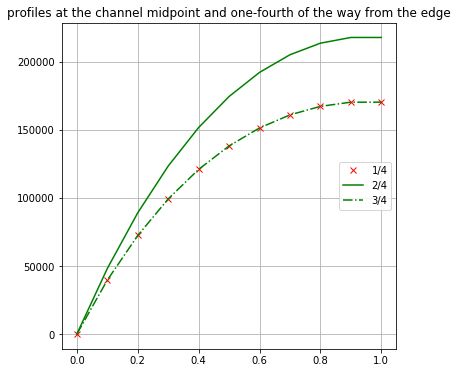

In [83]:
# plot center of domain
series_1_4 = u[ind_err,int((ny-1)/4*1),:]
series_2_4 = u[ind_err,int((ny-1)/4*2),:]
series_3_4 = u[ind_err,int((ny-1)/4*3),:]
# import matplotlib.ticker as tck
fig,ax = plt.subplots(1,1,figsize=(6,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
# ax.set_xscale('log')
ax0=ax.plot(np.linspace(0,1,11), series_1_4,'xr', label='1/4')
ax0=ax.plot(np.linspace(0,1,11), series_2_4,'-g', label='2/4')
ax0=ax.plot(np.linspace(0,1,11), series_3_4,'-.g', label='3/4')
# ax0=ax.plot(np.linspace(0,ind_err-1,ind_err-2), abs(series[0:-2] - series[1:-1]),'--g', label='max difference')
# ax.set_yscale("log")
ax.grid()
ax.legend(loc='right')
ax.set_title('profiles at the channel midpoint and one-fourth of the way from the edge')
# ax[1].set_yscale("log")

GS SOR

gs收敛步数

In [103]:
delta = 0.1
ny = int(2 / delta) + 1
nz = int(1 / delta) + 1 
[u_gs,ind_err_gs,abs_err_gs] = iterate(type='gs',delta=delta)
ind_err_gs

630

统计SOR收敛步数

In [136]:
test_w = np.linspace(1.5,2,51)
ind_err_sor_w = []
abs_err_sor_w = []
for i in test_w:
    delta = 0.1
    ny = int(2 / delta) + 1
    nz = int(1 / delta) + 1 
    [u_sor,ind_err_sor,abs_err_sor] = iterate(type='sor',delta=delta,w=i)
    ind_err_sor_w.append(ind_err_sor)
    abs_err_sor_w.append(abs_err_sor)

In [212]:
# 最小w对应索引
ind_optimal = ind_err_sor_w.index(min(ind_err_sor_w))
test_w[ind_optimal]

1.83

In [219]:
ind_err_sor_w[ind_optimal]

70

In [218]:
# w=2 , 1666步收敛
ind_err_sor_w[50]

1666

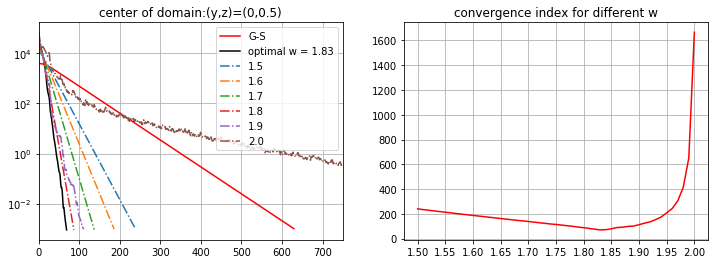

In [222]:
# plot center of domain
# series = u[0:ind_err,int((ny-1)/2),int((nz-1)/2)]

# import matplotlib.ticker as tck
fig,ax = plt.subplots(1,2,figsize=(12,4))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.
ax0=ax[1].plot(test_w, ind_err_sor_w,'-r', label='number')
# ax0=ax[0].plot(np.linspace(0,ind_err_sor-1,ind_err_sor), abs_err_sor,'-.g', label='center value')
# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
# ax.set_xscale('log')
ax0=ax[0].plot(np.linspace(0,ind_err_gs-1,ind_err_gs), abs_err_gs,'-r', label='G-S')
ax0=ax[0].plot(np.linspace(0,ind_err_sor_w[ind_optimal]-1,ind_err_sor_w[ind_optimal]), abs_err_sor_w[ind_optimal],'-k', label='optimal w = 1.83')
for i in range(0,60,10):
    ax0=ax[0].plot(np.linspace(0,ind_err_sor_w[i]-1,ind_err_sor_w[i]), abs_err_sor_w[i],'-.', label=test_w[i])
# ax0=ax.plot(np.linspace(0,ind_err-1,ind_err-2), abs(series[0:-2] - series[1:-1]),'--g', label='max difference')
ax[0].set_yscale("log")
ax[0].grid()
ax[0].legend(loc='upperright')
ax[0].set_title('center of domain:(y,z)=(0,0.5)')
ax[0].set_xlim(0,750)
ax[1].set_title('convergence index for different w')
ax[1].grid()
ax[1].set_xticks(np.linspace(1.5,2,11))